Problem Statement:
----------------
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [3]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import ttest_rel
from statsmodels.api  import qqplot
from scipy.stats import kruskal
from scipy.stats import shapiro

In [4]:
df = pd.read_csv('yulu.csv',parse_dates = ['datetime'])

In [5]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
df.shape

(10886, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year

In [10]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [11]:
df.describe(include = 'all')

/var/folders/3d/xd2j8v9940q4g7kc9mpsnln80000gn/T/ipykernel_48416/4220128335.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,2011.501929
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,0.500019
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2011.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,2011.000000


In [12]:
print(df['datetime'].min(), df['datetime'].max())

df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

2011-01-01 00:00:00 2012-12-19 23:00:00


value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

In [13]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

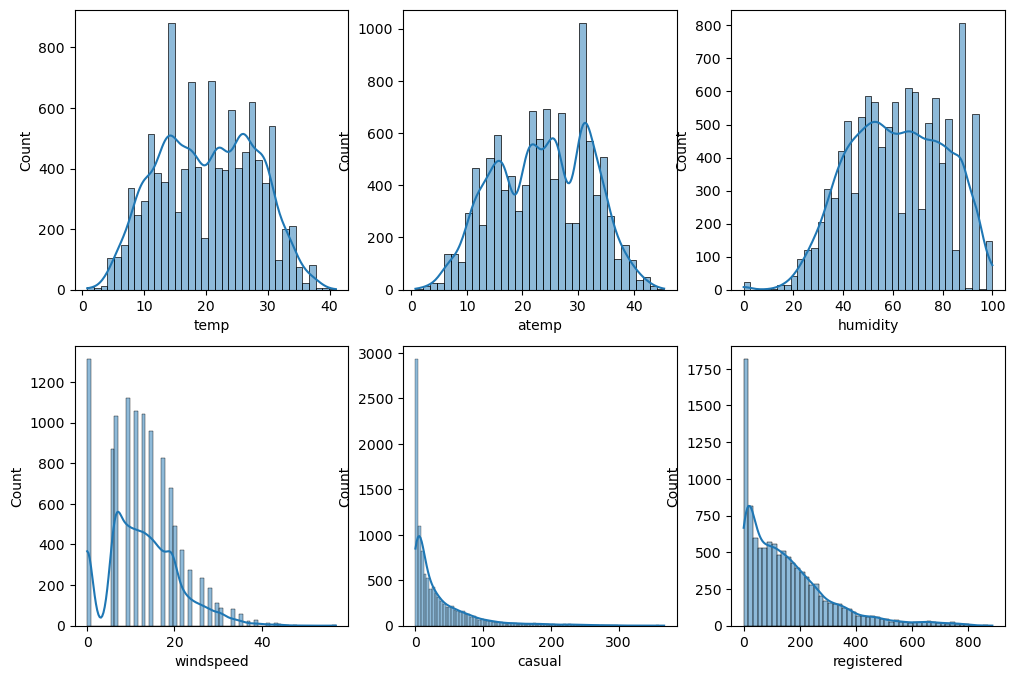

In [14]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

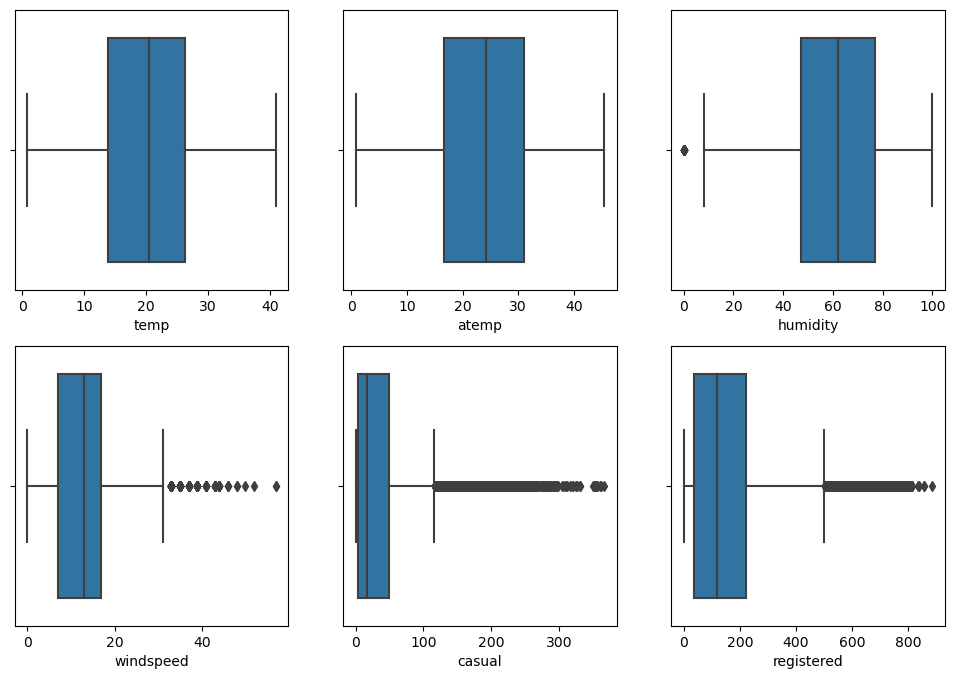

In [15]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x = df[num_cols[index]], ax=axis[row, col])
        index += 1

There are outliers in windspeed,casual,registered.

In [16]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [67]:
for i in num_cols:
    print("Column Name: ",i)
    print('Count of outliers :',find_outliers_IQR(df[i]).count())
    print('Minimum outlier value :',find_outliers_IQR(df[i]).min())
    print('Maximum outlier value :',find_outliers_IQR(df[i]).max())
    print('------------------------------')

Column Name:  temp
Count of outliers : 0
Minimum outlier value : nan
Maximum outlier value : nan
------------------------------
Column Name:  atemp
Count of outliers : 0
Minimum outlier value : nan
Maximum outlier value : nan
------------------------------
Column Name:  humidity
Count of outliers : 22
Minimum outlier value : 0
Maximum outlier value : 0
------------------------------
Column Name:  windspeed
Count of outliers : 227
Minimum outlier value : 32.9975
Maximum outlier value : 56.9969
------------------------------
Column Name:  casual
Count of outliers : 749
Minimum outlier value : 117
Maximum outlier value : 367
------------------------------
Column Name:  registered
Count of outliers : 423
Minimum outlier value : 502
Maximum outlier value : 886
------------------------------
Column Name:  count
Count of outliers : 300
Minimum outlier value : 648
Maximum outlier value : 977
------------------------------


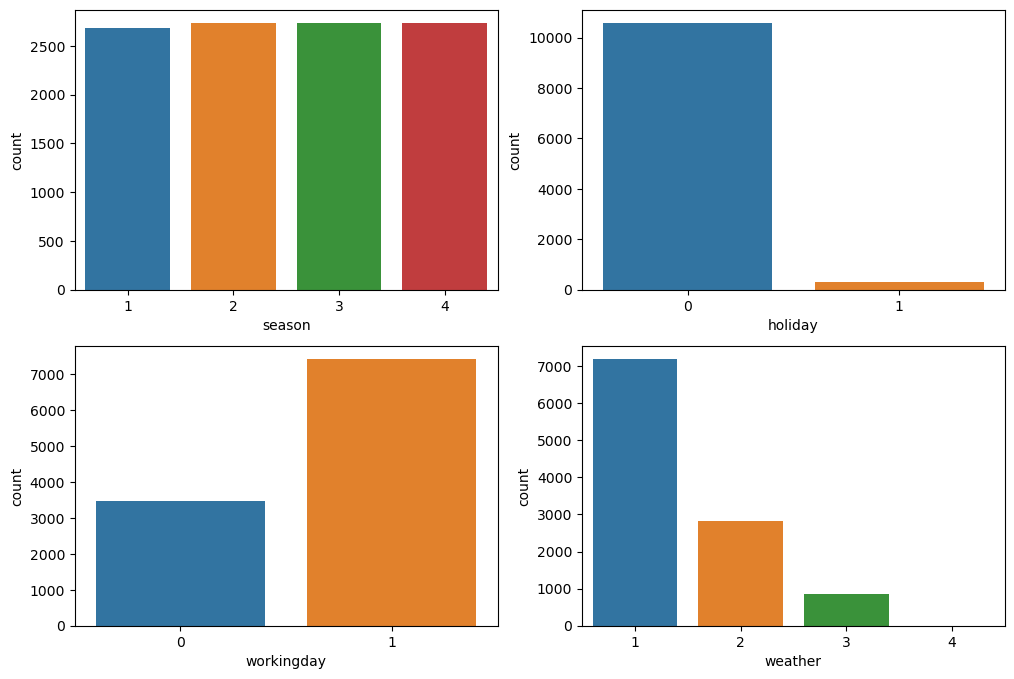

In [18]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(x = df[cat_cols[index]], ax=axis[row, col])
        index += 1

The count of bikes rented in seasons is almost equal.
The bike rented on holiday's is less than on week days.
The bike rented in weather 1 > weather 2 > weather 3 > weather 4.

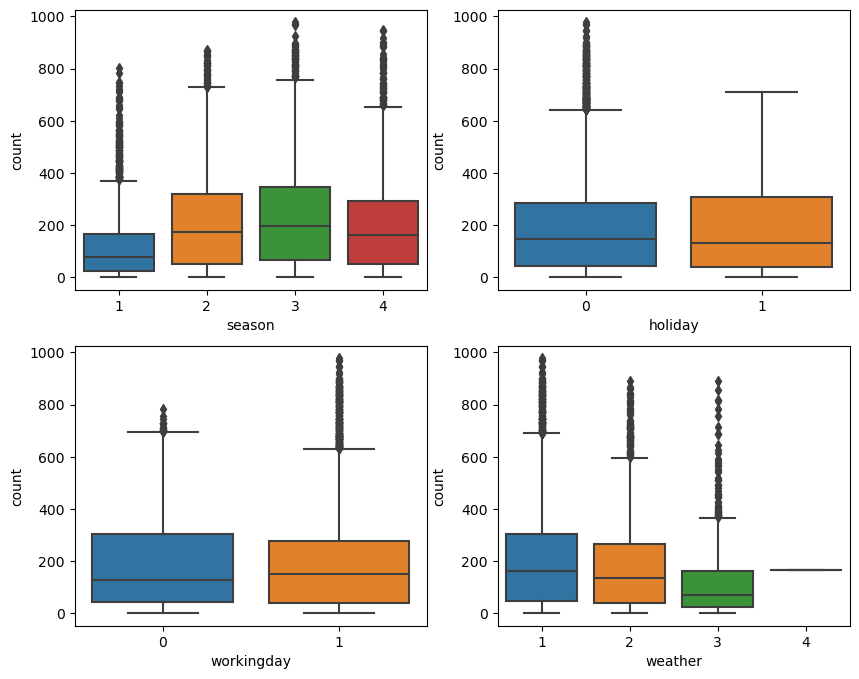

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

There are outliers in all categorical columns.

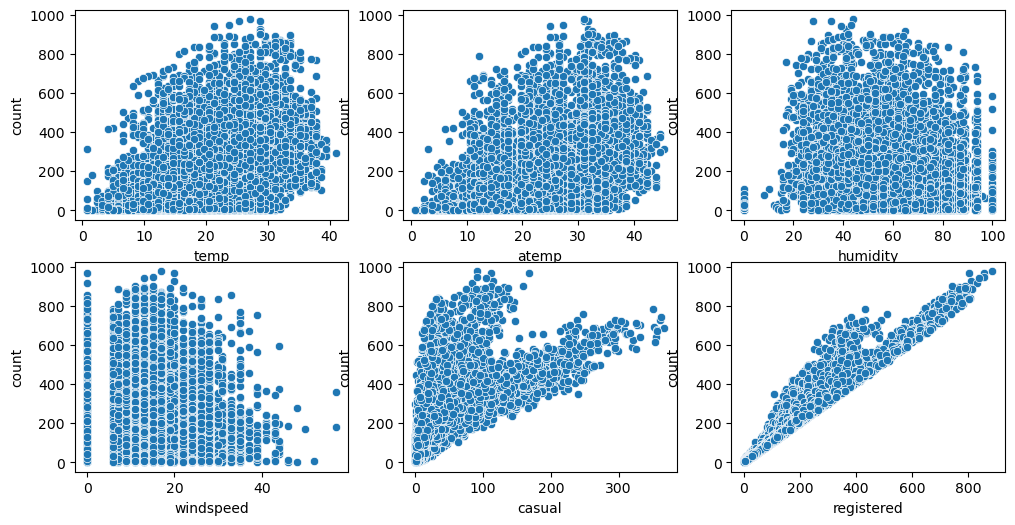

In [20]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

In [21]:
df.corr()

/var/folders/3d/xd2j8v9940q4g7kc9mpsnln80000gn/T/ipykernel_48416/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temp,atemp,humidity,windspeed,casual,registered,count,Month,Year
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,0.061226
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,0.058540
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.078606
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,-0.015221
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.145241
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,0.264265
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.166862,0.260403
Month,0.257589,0.264173,0.204537,-0.150192,0.092722,0.169451,0.166862,1.000000,-0.004932
Year,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,-0.004932,1.000000


/var/folders/3d/xd2j8v9940q4g7kc9mpsnln80000gn/T/ipykernel_48416/2206991514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap = 'Blues')


<Axes: >

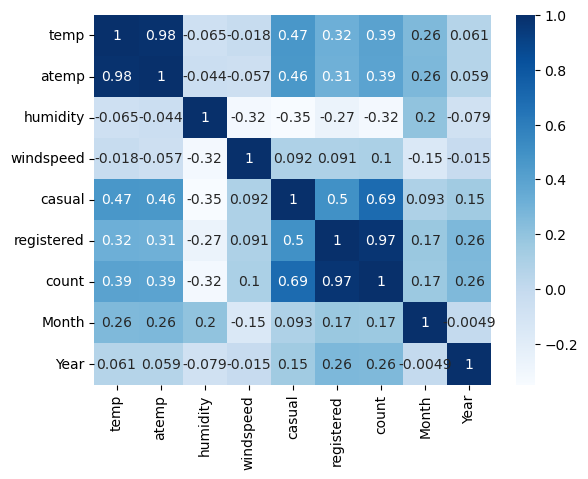

In [22]:
sns.heatmap(df.corr(),annot = True,cmap = 'Blues')

From above heatmap we can clearly see, if score > 0 then it is positvely correlated.
If score < 0 then it is negatively correlated.
Closer to 1 highly positively correleated.
Closer to -1 highly negatively correleated.

<Axes: xlabel='Year', ylabel='count'>

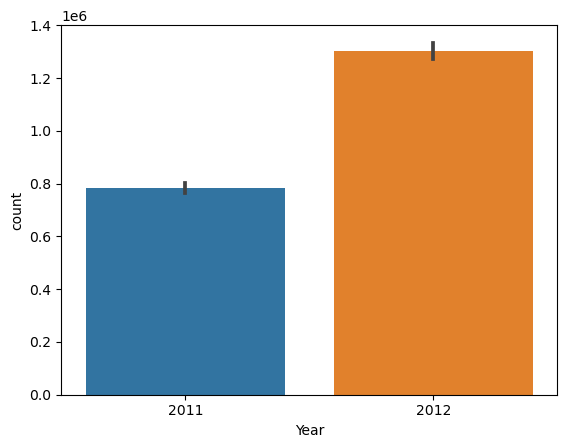

In [23]:
sns.barplot(x='Year',y='count',data = df,estimator = 'sum')

There is growth in bikes rented from 2011 to 2012.

<Axes: xlabel='Month', ylabel='count'>

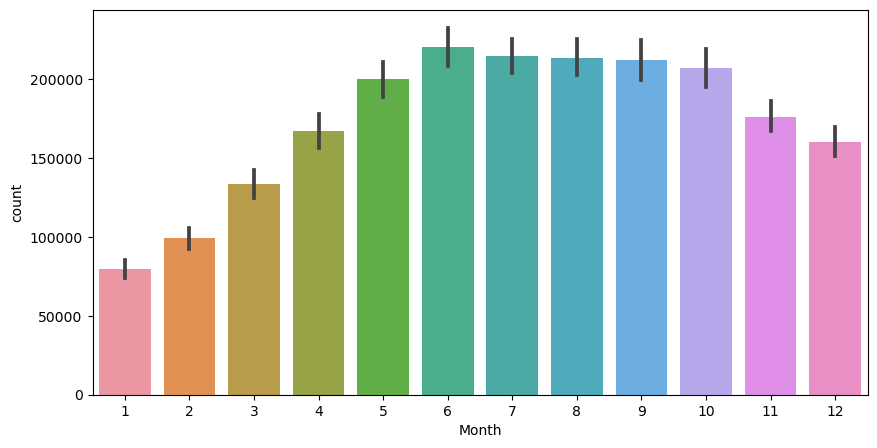

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='count',data = df,estimator = 'sum')

There is growth in bikes rented from JAN to OCT.
There is slight decline in bike rented from OCT to DEC.

<Axes: xlabel='Month', ylabel='count'>

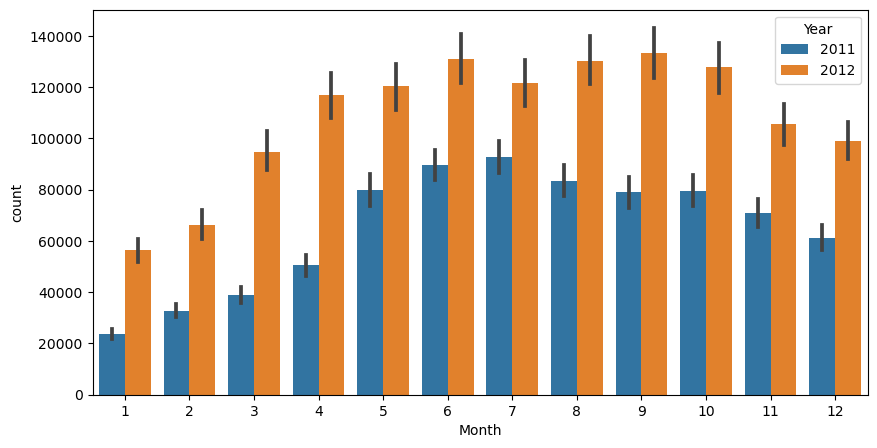

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='count',data = df,hue='Year',estimator = 'sum')

Each year:
There is growth in bikes rented from JAN to OCT.
There is slight decline in bike rented from OCT to DEC.

<Axes: xlabel='Month', ylabel='count'>

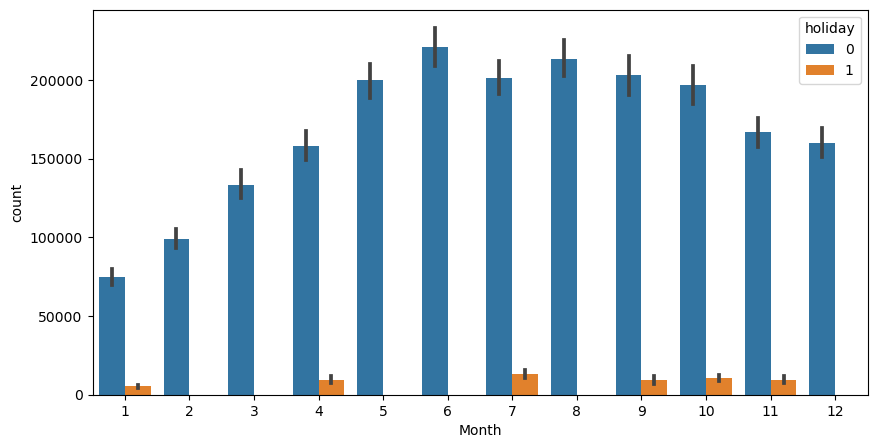

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='count',data = df,hue='holiday',estimator = 'sum')

<Axes: xlabel='Year', ylabel='count'>

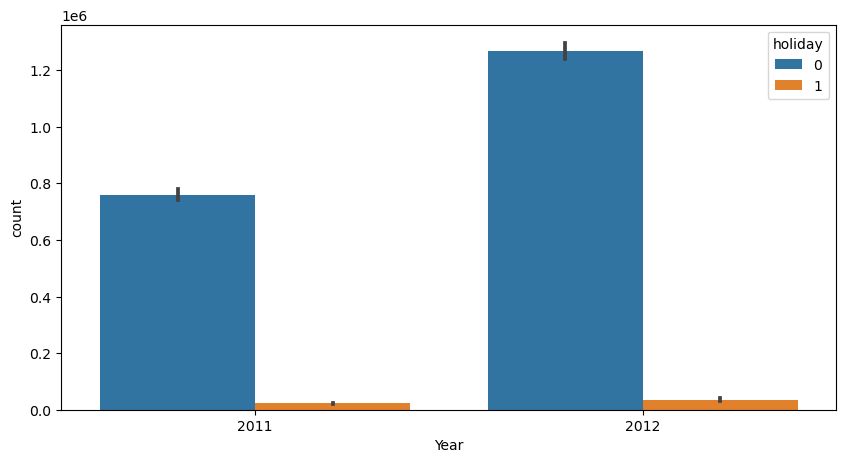

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year',y='count',data = df,hue='holiday',estimator = 'sum')

Bikes are rented more on weekdays

<Axes: xlabel='season', ylabel='count'>

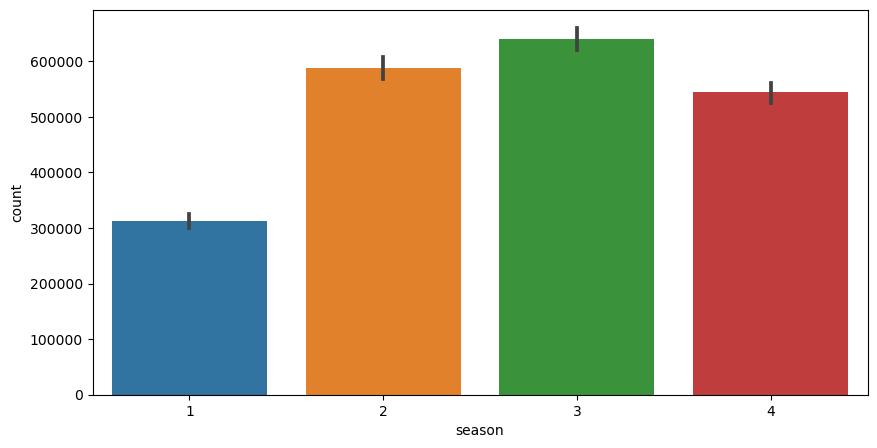

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x='season',y='count',data = df,estimator = 'sum')

Bikes are rented more in seasons 2,3,4.

<Axes: xlabel='season', ylabel='count'>

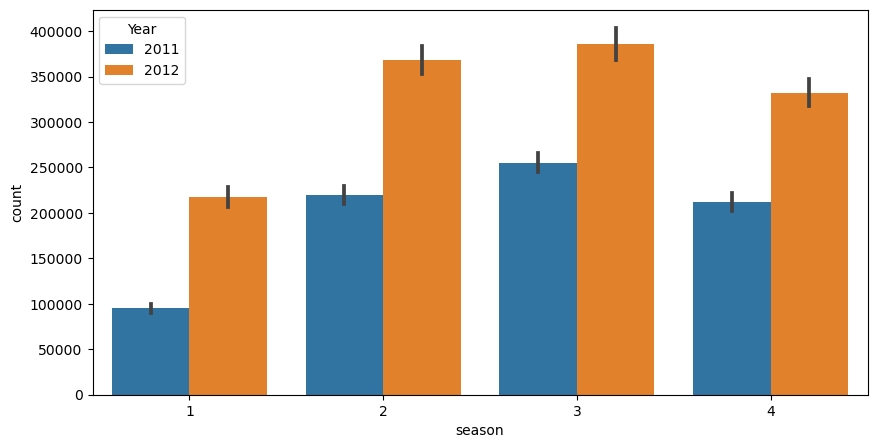

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='season',y='count',data = df,hue= 'Year',estimator = 'sum')

Bikes are rented more in seasons 2,3,4.

<Axes: xlabel='workingday', ylabel='count'>

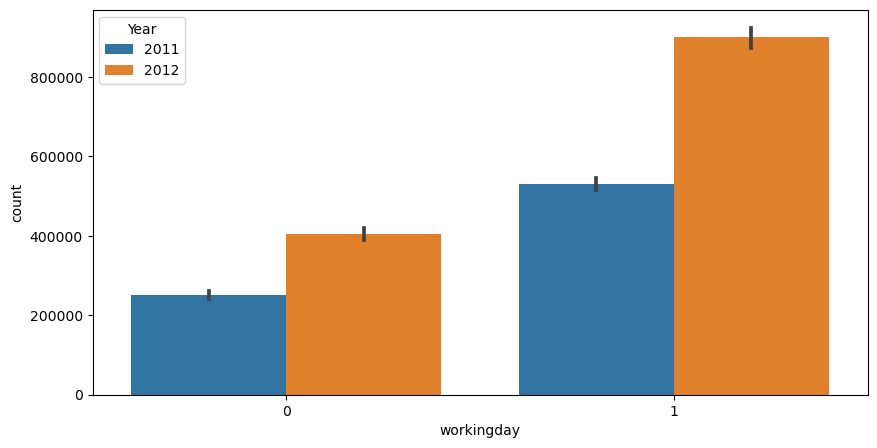

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='workingday',y='count',data = df,hue= 'Year',estimator = 'sum')

Bikes are rented more on working days.

<Axes: xlabel='Month', ylabel='count'>

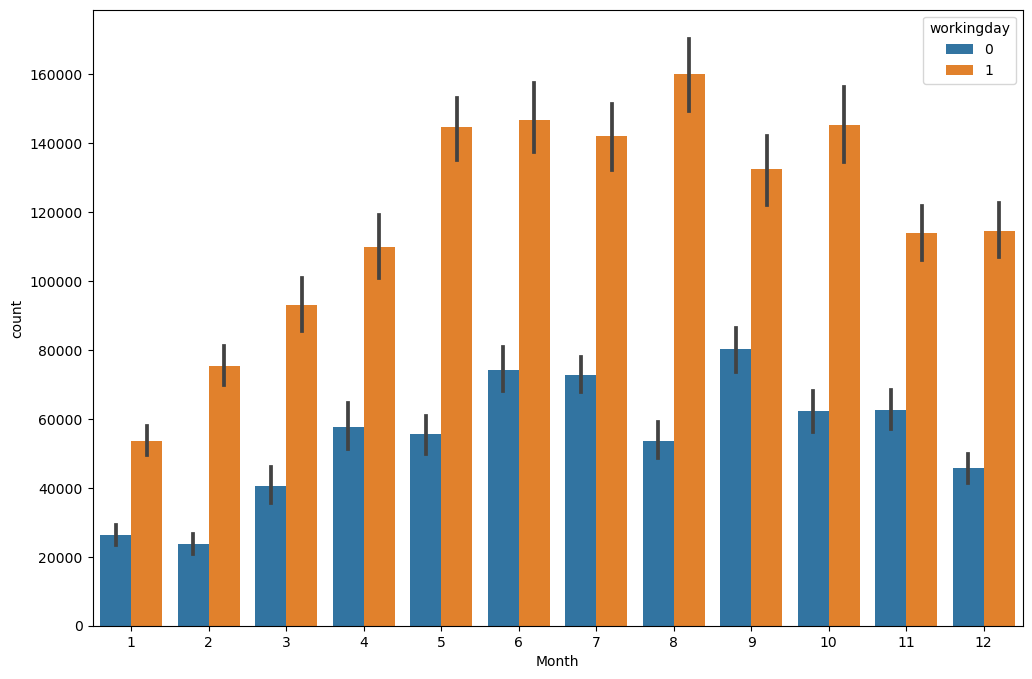

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month',y='count',data = df,hue= 'workingday',estimator='sum')

<Axes: xlabel='weather', ylabel='count'>

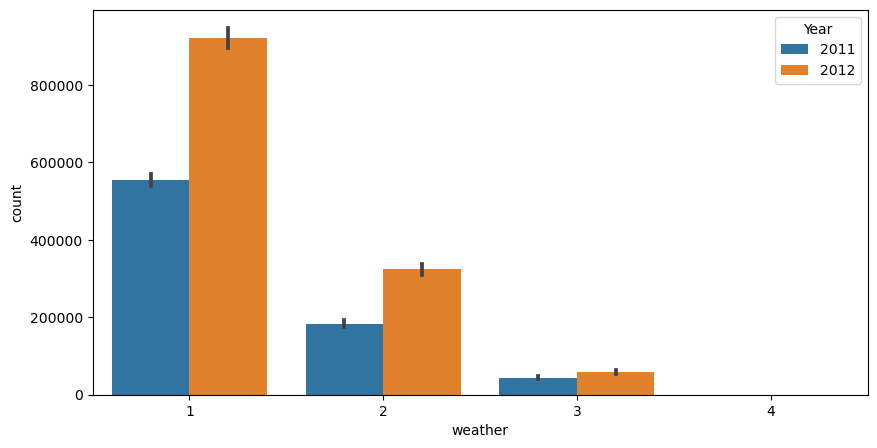

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='weather',y='count',data = df,hue= 'Year',estimator = 'sum')

In [33]:
# Grouping data for working day and non working day
g1 = df.loc[df['workingday'] == 0,'count']
g2 = df.loc[df['workingday'] == 1,'count']

In [34]:
g1.mean(),g2.mean()

(188.50662061024755, 193.01187263896384)

In [35]:
# Ho : g1.mean = g2.mean
# Ha : g1.mean < g2.mean

In [36]:
if ttest_ind(g1,g2,alternative = 'less')[1] < 0.05:
    print(ttest_ind(g1,g2,alternative = 'less'))
    print('reject Ho : Therefore, mean vehicles rented for working day as well as non working day are different.')
else:
    print(ttest_ind(g1,g2,alternative = 'less'))
    print('Fails to reject Ho : Therefore, mean vehicles rented for working day as well as non working day are similar.')

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.11322402113180674)
Fails to reject Ho : Therefore, mean vehicles rented for working day as well as non working day are similar.


In [37]:
g1 = df.loc[df['holiday'] == 0,'count']
g2 = df.loc[df['holiday'] == 1,'count']

In [38]:
g1.mean(),g2.mean()

(191.7416548463357, 185.87781350482314)

In [39]:
# Ho : g1.mean = g2.mean
# Ha : g1.mean > g2.mean

In [40]:
if ttest_ind(g1,g2,alternative = 'greater')[1] < 0.05:
    print(ttest_ind(g1,g2,alternative = 'less'))
    print('reject Ho : Therefore, mean vehicles rented for holiday as well as weekday are different.')
else:
    print(ttest_ind(g1,g2,alternative = 'less'))
    print('Fails to reject Ho : Therefore, mean vehicles rented for holiday as well as weekday are similar.')

Ttest_indResult(statistic=0.5626388963477119, pvalue=0.7131538058364448)
Fails to reject Ho : Therefore, mean vehicles rented for holiday as well as weekday are similar.


In [41]:
# Ho: There is no relationship between categories
# Ha: There is relationship between both categories.

In [42]:
pd.crosstab(df['season'],df['weather'])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [43]:
p_value = chi2_contingency(pd.crosstab(df['season'],df['weather']).values)[1]
if p_value < 0.05:
    print(p_value)
    print('Reject Ho: "There is relationship between weather and season"')
else:
    print(p_value)
    print('Fails to reject Ho: "There is no relationship between weather and season"')

1.549925073686492e-07
Reject Ho: "There is relationship between weather and season"


In [44]:
# Groups for different seasons
g1 = df.loc[df['season'] == 1,'count']
g2 = df.loc[df['season'] == 2,'count']
g3 = df.loc[df['season'] == 3,'count']
g4 = df.loc[df['season'] == 4,'count']

In [45]:
# Groups for different weathers
g5 = df.loc[df['season'] == 1,'count']
g6 = df.loc[df['season'] == 2,'count']
g7 = df.loc[df['season'] == 3,'count']
g8 = df.loc[df['season'] == 4,'count']

In [46]:
# Validaing assumptions of ANOVA
# Checking for equal variance across groups using levene
# Ho : Variance is equal across groups
# Ha : Variance is not equal across groups

In [47]:
groups = [g1,g2,g3,g4,g5,g6,g7,g8]

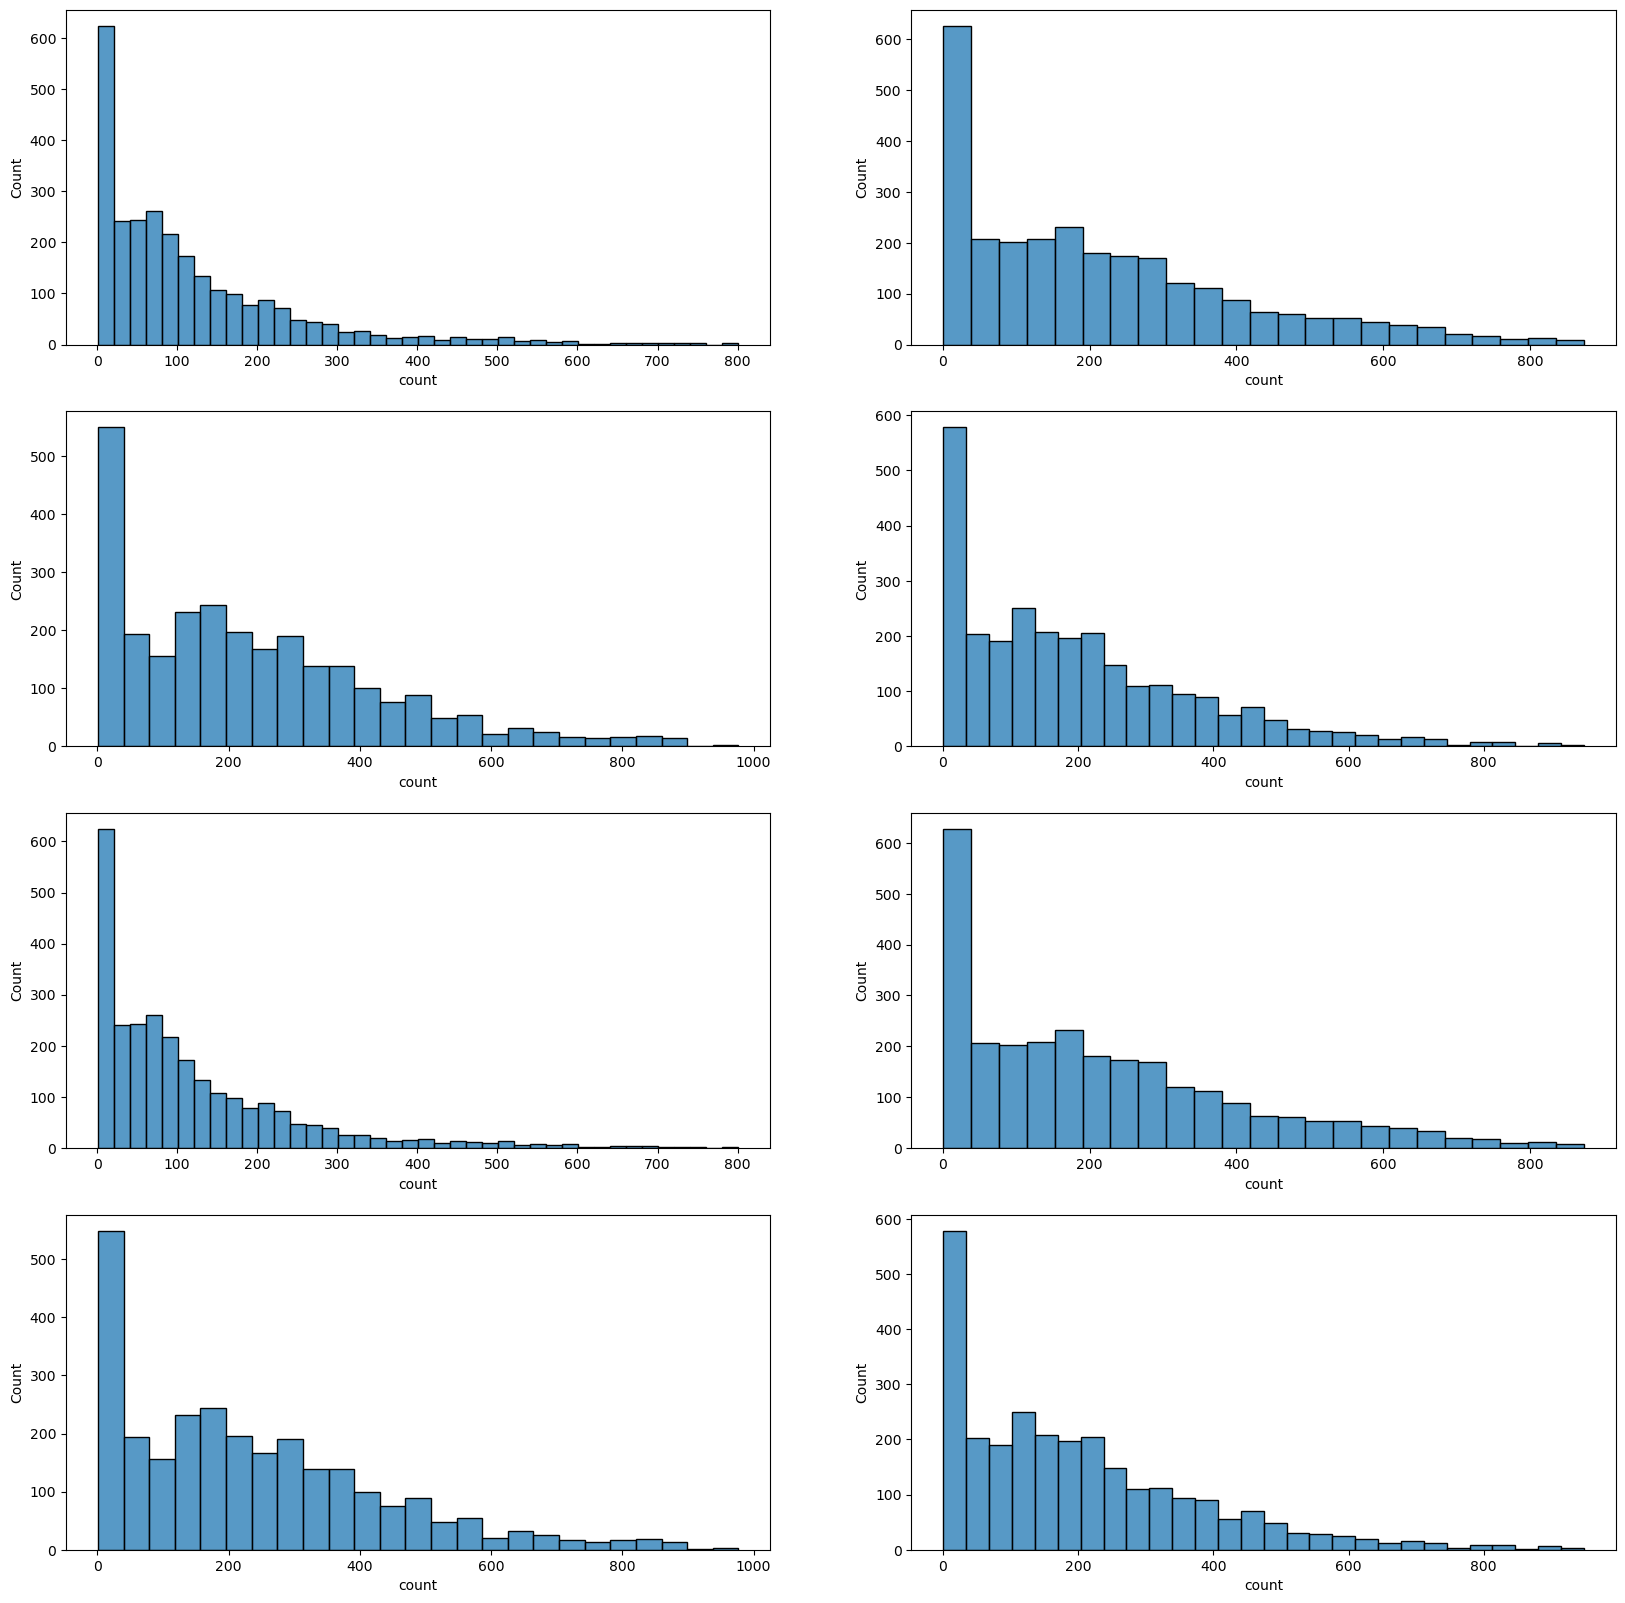

In [48]:
# Checking distribution of each numerical field
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
index = 0
for row in range(4):
    for col in range(2):
        sns.histplot(groups[index],ax = axis[row,col])
        index += 1

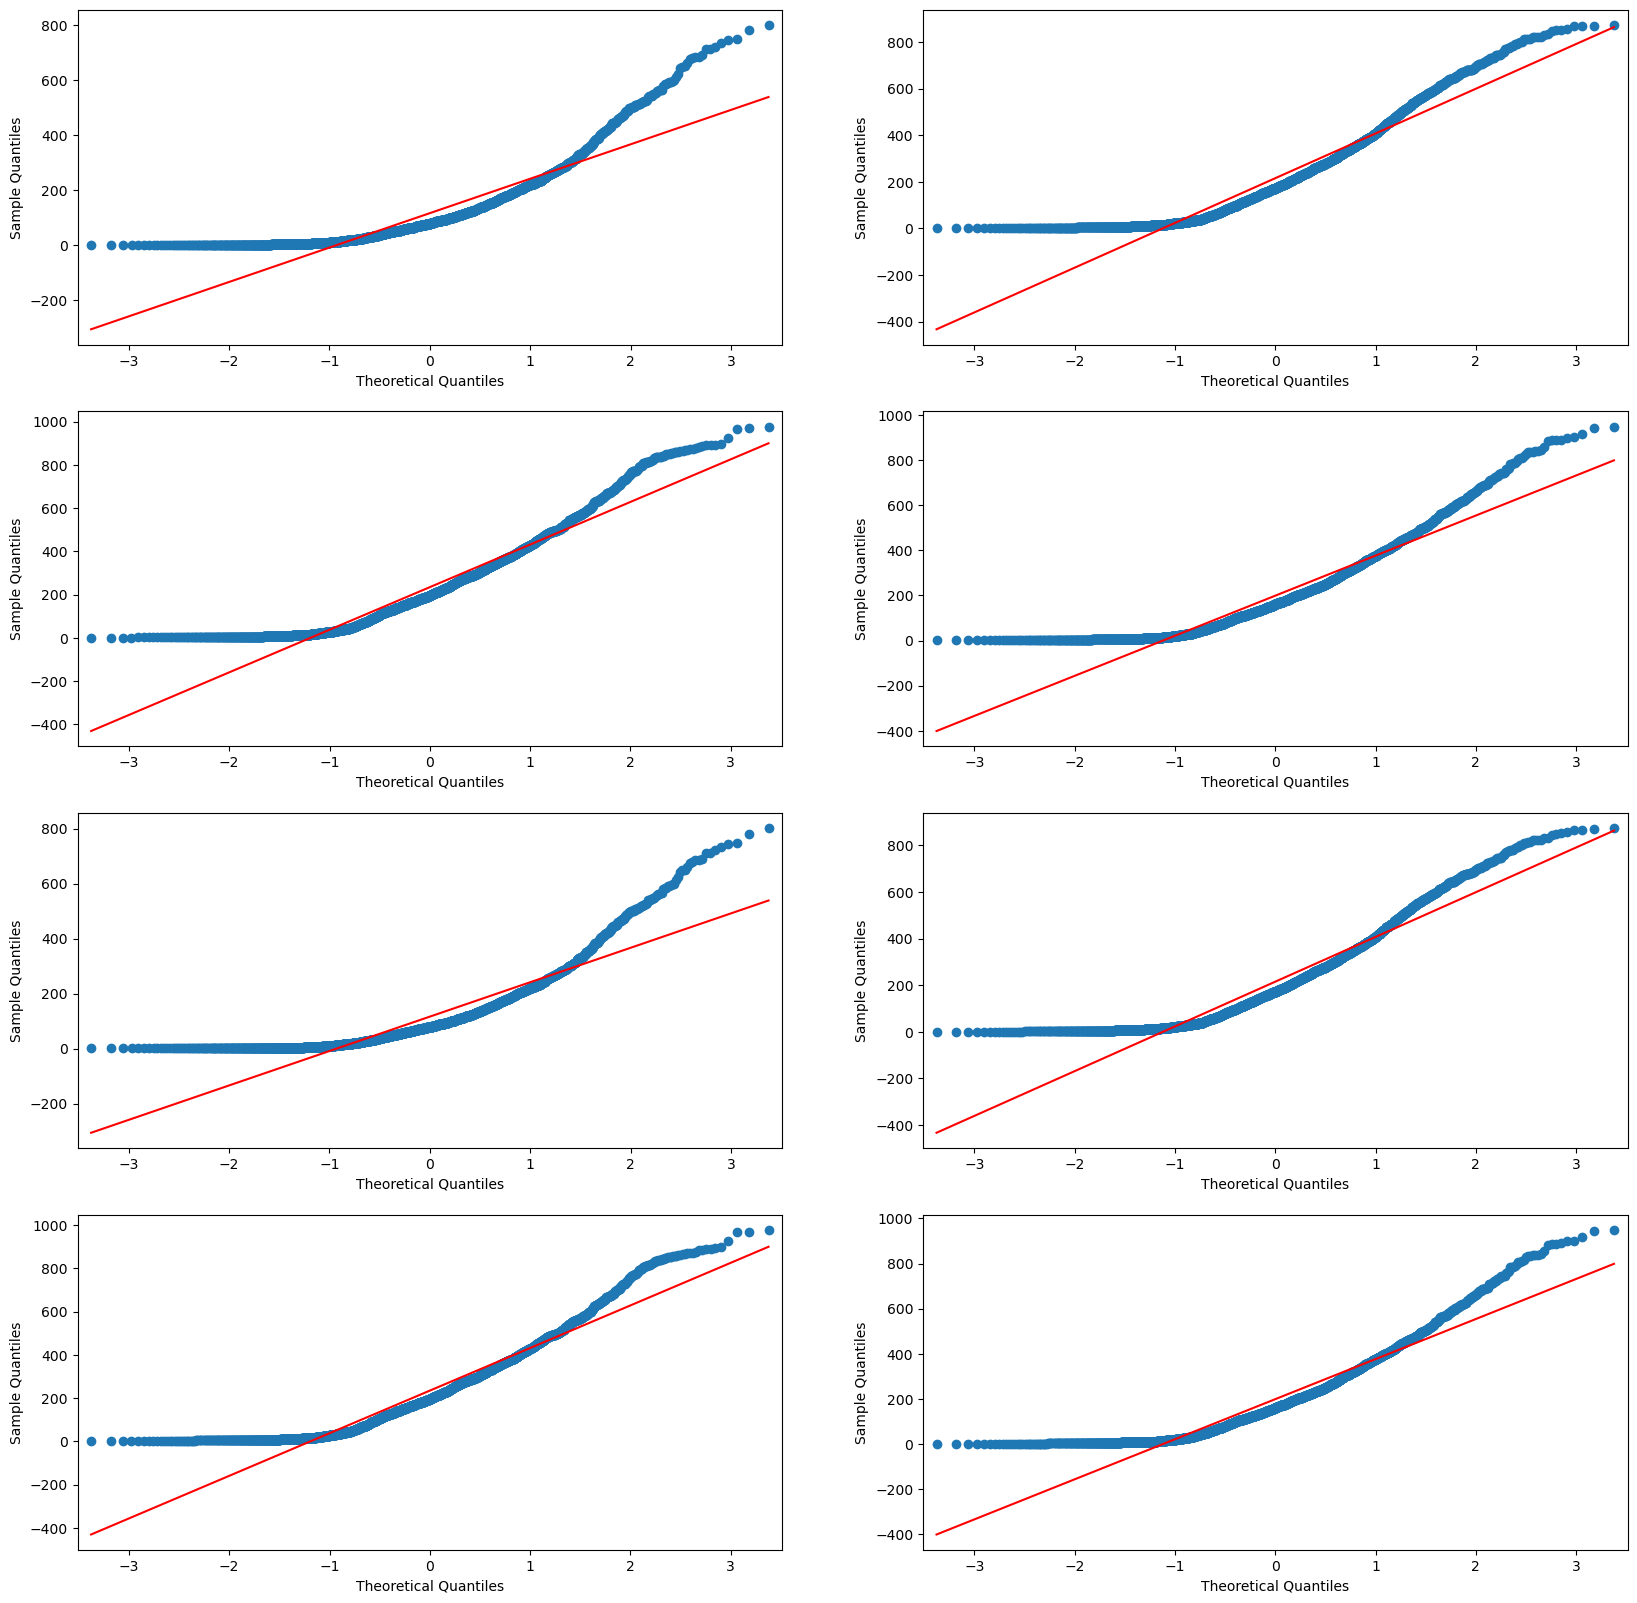

In [49]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
index = 0
for row in range(4):
    for col in range(2):
        qqplot(groups[index], line="s",ax = axis[row,col])
        index += 1

In [50]:
# Ho: Data is Gaussian
# Ha: Data is not gaussian
for g in groups:
    print(shapiro(g.sample(100)))
    if shapiro(g.sample(100))[1] < 0.05:
        print('Reject Ho: Data is not Gaussian')
    else:
        print('Fails to reject Ho: Data is Gaussian')

ShapiroResult(statistic=0.8095094561576843, pvalue=4.902556138830505e-10)
Reject Ho: Data is not Gaussian
ShapiroResult(statistic=0.9230470061302185, pvalue=2.0497303921729326e-05)
Reject Ho: Data is not Gaussian
ShapiroResult(statistic=0.8978712558746338, pvalue=1.1243247399761458e-06)
Reject Ho: Data is not Gaussian
ShapiroResult(statistic=0.9005696773529053, pvalue=1.5038950778034632e-06)
Reject Ho: Data is not Gaussian
ShapiroResult(statistic=0.9027798175811768, pvalue=1.914815811687731e-06)
Reject Ho: Data is not Gaussian
ShapiroResult(statistic=0.8942918181419373, pvalue=7.69489417962177e-07)
Reject Ho: Data is not Gaussian
ShapiroResult(statistic=0.9193287491798401, pvalue=1.2968895134690683e-05)
Reject Ho: Data is not Gaussian
ShapiroResult(statistic=0.8779266476631165, pvalue=1.4843865869806905e-07)
Reject Ho: Data is not Gaussian


In [51]:
# Ho: Var is equal
# Ha: Var is not equal
if levene(g1,g2,g3,g4,g5,g6,g7,g8)[1]<0.05:
    print('p_val: ',levene(g1,g2,g3,g4)[1])
    print('Reject Ho, therefore variance is not equal across groups and with cannot proceed with anova.')

p_val:  1.0147116860043298e-118
Reject Ho, therefore variance is not equal across groups and with cannot proceed with anova.


In [52]:
# Ho: Means are equal for each group
# Ha: Atleast one group mean is different from rest groups.

In [53]:
#assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal_stat, p_value = kruskal(g1,g2,g3,g4,g5,g6,g7,g8)
print("p_value===",p_value)
if p_value<0.05:
    print("Since p-value is less than 0.05, we reject the null hypothesis")
    print('Atleast one group mean is different from rest groups')

p_value=== 5.210053232883095e-298
Since p-value is less than 0.05, we reject the null hypothesis
Atleast one group mean is different from rest groups


In [54]:
# We can ignore this assumptions in reality and go with the annova itself.

In [55]:
f_oneway(g1,g2,g3,g4,g5,g6,g7,g8)

F_onewayResult(statistic=203.09718069456093, pvalue=3.099184115882506e-293)

We can see using anova also we get a very small p_value.
We can reject Ho.
Therefore, atleast one group mean is different from rest groups.

In [56]:
df.loc[df['holiday']==0,'casual'].mean(),df.loc[df['holiday']==1,'casual'].mean()

(35.64671394799054, 48.78135048231511)

In [57]:
# Ho: mu1 = mu2
# Ha: mu1 < mu2
print(ttest_ind(df.loc[df['holiday']==0,'casual'],df.loc[df['holiday']==1,'casual'],alternative = 'less'))
if ttest_ind(df.loc[df['holiday']==0,'casual'],df.loc[df['holiday']==1,'casual'],alternative = 'less')[1] < 0.05:
    print('Reject Ho: Means are different')
else:
    print('Fails to reject Ho: Means are similar')

Ttest_indResult(statistic=-4.573774174629942, pvalue=2.421530012047593e-06)
Reject Ho: Means are different


In [58]:
df.loc[df['workingday']==0,'casual'].mean(),df.loc[df['workingday']==1,'casual'].mean()

(59.30829015544042, 25.10766324878575)

In [59]:
# Ho: mu1 = mu2
# Ha: mu1 > mu2
print(ttest_ind(df.loc[df['workingday']==0,'casual'],df.loc[df['workingday']==1,'casual'],alternative = 'greater'))
if ttest_ind(df.loc[df['workingday']==0,'casual'],df.loc[df['workingday']==1,'casual'],alternative = 'greater')[1] < 0.05:
    print('Reject Ho: Means are different')
else:
    print('Fails to reject Ho: Means are similar')

Ttest_indResult(statistic=35.12830185964087, pvalue=1.78098371180272e-256)
Reject Ho: Means are different


In [60]:
df.loc[df['holiday']==0,'registered'].mean(),df.loc[df['holiday']==1,'registered'].mean()

(156.09494089834516, 137.09646302250803)

In [61]:
# Ho: mu1 = mu2
# Ha: mu1 > mu2
print(ttest_ind(df.loc[df['holiday']==0,'registered'],df.loc[df['holiday']==1,'registered'],alternative = 'greater'))
if ttest_ind(df.loc[df['holiday']==0,'registered'],df.loc[df['holiday']==1,'registered'],alternative = 'greater')[1] < 0.05:
    print('Reject Ho: Means are different')
else:
    print('Fails to reject Ho: Means are similar')

Ttest_indResult(statistic=2.186710333165583, pvalue=0.01439244596180164)
Reject Ho: Means are different


In [62]:
df.loc[df['workingday']==0,'registered'].mean(),df.loc[df['workingday']==1,'registered'].mean()

(129.19833045480715, 167.9042093901781)

In [63]:
# Ho: mu1 = mu2
# Ha: mu1 < mu2
print(ttest_ind(df.loc[df['workingday']==0,'registered'],df.loc[df['workingday']==1,'registered'],alternative = 'less'))
if ttest_ind(df.loc[df['workingday']==0,'registered'],df.loc[df['workingday']==1,'registered'],alternative = 'less')[1] < 0.05:
    print('Reject Ho: Means are different')
else:
    print('Fails to reject Ho: Means are similar')

Ttest_indResult(statistic=-12.552707000266874, pvalue=3.403246859958037e-36)
Reject Ho: Means are different


Suggestions and Observations:
-----
• The medians of working day is always higher than that of non working day regard less of the seasons.

• The highest number of booking is from fall

• Using t test, at alpha 5% we see p value > 0.05, hence we accept the Ho. hence we can say that working day doesn't affect the count of bikes booked on yulu because same useage is observed on non working day too. Yulu should try to attract more customers on working days and try to make it as an alternate to work travel mode.
Special peak timing offers and high availabilty of yulu bikes will contribute to the increase in bookings.

• Using anova test, taking alpha as 5%, we still see pvalue<0.05 hence we reject the Ho and accept ha that is yes the weather has affect on the number of cycles rented out. Yulu needs to pay attention on the weather conditions to increase it's bike active users. Weather and customer profiling will help to come up with new product features on yulu.

• Using anova, taking alpha as 5%, we still see pvalue<0.05 hence we reject the Ho and accept ha that is yes the season has affect on the number of cycles rented out. Yulu needs to focus more on the seasonal offerings of the bikes to make more active users retention. Student discounts in summer and school hours will also attract new customer base.

• Using chi square test, the p value is very less than alpha at 5%, we reject the Ho and accept h1. season has some influence on the weather. We say it with hich confidence. Use of meterological features will helo in boosting the bookings.